In [1]:
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

2025-03-13 10:38:00.337092: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 10:38:00.936292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741862281.159697     509 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741862281.224662     509 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 10:38:01.813662: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                             image     label
0         images/train/angry/Training_10118481.jpg     angry
1         images/train/angry/Training_10120469.jpg     angry
2         images/train/angry/Training_10131352.jpg     angry
3         images/train/angry/Training_10161559.jpg     angry
4          images/train/angry/Training_1021836.jpg     angry
...                                            ...       ...
28704  images/train/surprise/Training_99916297.jpg  surprise
28705  images/train/surprise/Training_99924420.jpg  surprise
28706  images/train/surprise/Training_99937001.jpg  surprise
28707  images/train/surprise/Training_99951755.jpg  surprise
28708  images/train/surprise/Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                             image     label
0       images/test/angry/PrivateTest_10131363.jpg     angry
1       images/test/angry/PrivateTest_10304478.jpg     angry
2        images/test/angry/PrivateTest_1054527.jpg     angry
3       images/test/angry/PrivateTest_10590091.jpg     angry
4        images/test/angry/PrivateTest_1109992.jpg     angry
...                                            ...       ...
7173  images/test/surprise/PublicTest_98089595.jpg  surprise
7174  images/test/surprise/PublicTest_98567249.jpg  surprise
7175  images/test/surprise/PublicTest_98972870.jpg  surprise
7176  images/test/surprise/PublicTest_99242645.jpg  surprise
7177  images/test/surprise/PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         images/test/angry/PrivateTest_10131363.jpg
1         images/test/angry/PrivateTest_10304478.jpg
2          images/test/angry/PrivateTest_1054527.jpg
3         images/test/angry/PrivateTest_10590091.jpg
4          images/test/angry/Pr

In [7]:
from tqdm.notebook import tqdm

In [8]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features
    

In [9]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [10]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [11]:
x_train = train_features/255.0
x_test = test_features/255.0

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [14]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [16]:
import numpy as np

# Save training data into one file
np.savez("train_data.npz", x_train=x_train, y_train=y_train)

# Save testing data into one file
np.savez("test_data.npz", x_test=x_test, y_test=y_test)

print("Preprocessed data saved successfully into single files!")


Preprocessed data saved successfully into single files!


In [24]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


/home/shankar/miniconda3/envs/gpu/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1741808474.298800     421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [26]:
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
import tensorflow as tf
with tf.device('/GPU:0'):
    model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


I0000 00:00:1741808675.902590    1416 service.cc:148] XLA service 0x558bc4ade1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741808675.904200    1416 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-03-12 19:44:36.186496: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741808676.913225    1416 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-12 19:44:39.095303: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3063', 12 bytes spill stores, 16 bytes spill loads

2025-03-12 19:44:44.930086: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.61GiB with freed_by_count=0. The caller indicate

224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.2397 - loss: 1.8352

2025-03-12 19:45:33.697709: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.23GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.2398 - loss: 1.8352

2025-03-12 19:45:42.536070: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_112_0', 768 bytes spill stores, 720 bytes spill loads

2025-03-12 19:45:42.780053: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_112_0', 228 bytes spill stores, 228 bytes spill loads



225/225 ━━━━━━━━━━━━━━━━━━━━ 81s 239ms/step - accuracy: 0.2398 - loss: 1.8351 - val_accuracy: 0.2471 - val_loss: 1.8129
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 127ms/step - accuracy: 0.2525 - loss: 1.8063 - val_accuracy: 0.2548 - val_loss: 1.7951
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 29s 127ms/step - accuracy: 0.2638 - loss: 1.7743 - val_accuracy: 0.3133 - val_loss: 1.6620
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.3247 - loss: 1.6723 - val_accuracy: 0.4092 - val_loss: 1.5059
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.3982 - loss: 1.5465 - val_accuracy: 0.4537 - val_loss: 1.4069
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.4309 - loss: 1.4684 - val_accuracy: 0.4859 - val_loss: 1.3362
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.4516 - loss: 1.4204 - val_accuracy: 0.4976 - val_loss: 1.2888
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.4758 - loss: 1.371

In [28]:
model_json = model.to_json()
with open("emotiondetector1.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector1.h5")

In [19]:
from keras.models import model_from_json

In [23]:
json_file = open("emotiondetector1.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector1.h5")

I0000 00:00:1741815836.709941     409 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [24]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [25]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [26]:
image = 'images/train/sad/Training_23814.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


I0000 00:00:1741815849.920821     968 service.cc:148] XLA service 0x7fbc4c004360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741815849.922871     968 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-03-12 21:44:09.977015: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741815850.107082     968 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
model prediction is  sad


I0000 00:00:1741815852.769280     968 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
model prediction is  angry


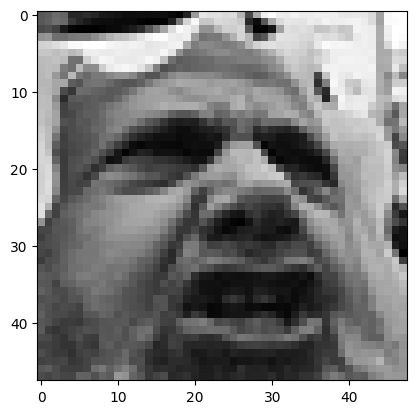

In [53]:
image = 'images/test/angry/PrivateTest_731447.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get true labels and predicted labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to label indices
y_pred = np.argmax(model.predict(x_test), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute evaluation metrics
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Compute test accuracy
test_accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       958
           1       0.89      0.50      0.64       111
           2       0.52      0.43      0.47      1024
           3       0.83      0.84      0.83      1774
           4       0.53      0.66      0.59      1233
           5       0.51      0.48      0.49      1247
           6       0.80      0.76      0.78       831

    accuracy                           0.64      7178
   macro avg       0.66      0.61      0.62      7178
weighted avg       0.64      0.64      0.64      7178

Test Accuracy: 63.62%


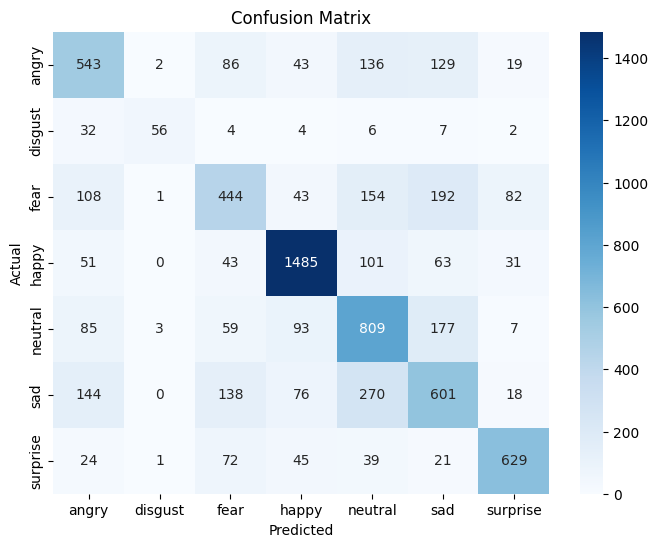

In [30]:
# Plot confusion matrix
plt.figure(figsize=(8,6))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label.values(), yticklabels=label.values())
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label, yticklabels=label)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()